In [99]:
# Load the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

In [100]:
# Load datasets
employee_data = pd.read_csv("C:/Users/vuyis/Downloads/archive (2)/HR_Analytics.csv.csv")  # Replace with your employee dataset path
investment_data = pd.read_csv("C:/Users/vuyis/Downloads/archive (4)/financial time series datasets/data/DJI.csv")  # Replace with your investment dataset path


In [101]:
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                0 non-null      int64 
 1   Attrition                          0 non-null      int64 
 2   BusinessTravel                     0 non-null      object
 3   DailyRate                          0 non-null      int64 
 4   DistanceFromHome                   0 non-null      int64 
 5   Education                          0 non-null      int64 
 6   EducationField                     0 non-null      object
 7   EmployeeCount                      0 non-null      int64 
 8   EmployeeNumber                     0 non-null      int64 
 9   EnvironmentSatisfaction            0 non-null      int64 
 10  HourlyRate                         0 non-null      int64 
 11  JobInvolvement                     0 non-null      int64 
 12  JobLevel                 

In [102]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Example of filling missing values (adjust as necessary)
data['MonthlyIncome'].fillna(data['MonthlyIncome'].median(), inplace=True)
# Drop rows with missing values if necessary
data.dropna(inplace=True)


Age                                  0
Attrition                            0
BusinessTravel                       0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EducationField                       0
EmployeeCount                        0
EmployeeNumber                       0
EnvironmentSatisfaction              0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobRole                              0
JobSatisfaction                      0
MaritalStatus                        0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
Over18                               0
OverTime                             0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StandardHours                        0
StockOptionLevel         

In [103]:
# Example feature engineering: creating a high-income binary feature
data['HighIncome'] = (data['MonthlyIncome'] > 7000).astype(int)  # Threshold can be adjusted


In [104]:
# Mapping 'Attrition' column to binary
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# Check for necessary columns before applying one-hot encoding
if 'Department' in data.columns and 'Gender' in data.columns:
    # One-hot encoding for categorical features like 'Department' and 'Gender'
    data = pd.get_dummies(data, columns=['Department', 'Gender'], drop_first=True)
else:
    print("Warning: 'Department' or 'Gender' columns are missing.")


In [105]:
# Define features and target variable
X = data[['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'DistanceFromHome']]
y = data['Attrition']


In [106]:
# Assuming 'Attrition' is your target variable
if 'Attrition' in data.columns:
    y = data['Attrition'].map({'Yes': 1, 'No': 0})  # Convert target variable to binary
    X = data.drop('Attrition', axis=1)

    # Check the shape and content of X and y
    print("Shape of X:", X.shape)
    print("Shape of y:", y.shape)
    print("First few rows of X:\n", X.head())
    print("First few rows of y:\n", y.head())

Shape of X: (0, 36)
Shape of y: (0,)
First few rows of X:
 Empty DataFrame
Columns: [Age, BusinessTravel, DailyRate, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, HighIncome, Department_Research & Development, Department_Sales, Gender_Male]
Index: []

[0 rows x 36 columns]
First few rows of y:
 Series([], Name: Attrition, dtype: int64)


In [107]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [108]:
# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [109]:
# Initialize models
logreg = LogisticRegression()
tree = DecisionTreeClassifier(random_state=42)
forest = RandomForestClassifier(random_state=42)

In [110]:
# Train models
logreg.fit(X_train, y_train)
tree.fit(X_train, y_train)
forest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [111]:
# Make predictions
logreg_pred = logreg.predict(X_test)
tree_pred = tree.predict(X_test)
forest_pred = forest.predict(X_test)

In [112]:
# Evaluate models
def evaluate_model(name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f'{name} Model Accuracy: {accuracy:.2f}')
    print(f'{name} Model ROC AUC: {roc_auc:.2f}')

    # Create confusion matrix plot
    plt.figure(figsize=(6, 4))  # Specify figure size for better visualization
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Logistic Regression Model Accuracy: 0.86
Logistic Regression Model ROC AUC: 0.50


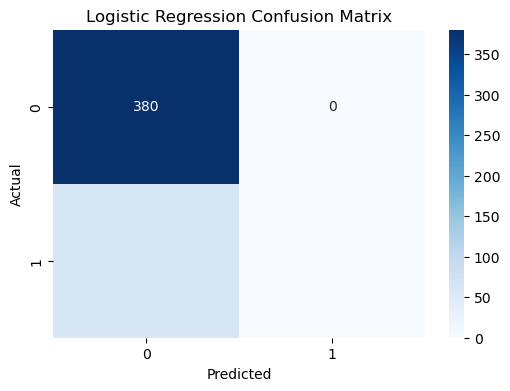

In [113]:
# Logistic Regression Evaluation
evaluate_model("Logistic Regression", y_test, logreg_pred)


Decision Tree Model Accuracy: 0.73
Decision Tree Model ROC AUC: 0.49


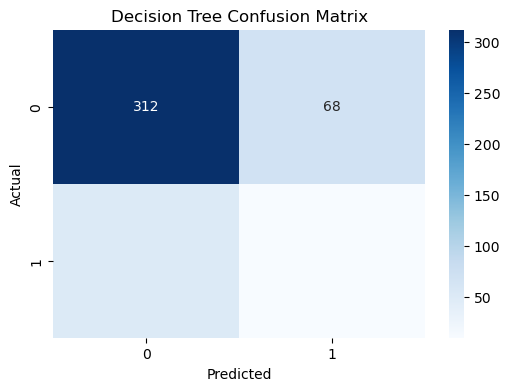

In [114]:
# Decision Tree Evaluation
evaluate_model("Decision Tree", y_test, tree_pred)

Random Forest Model Accuracy: 0.84
Random Forest Model ROC AUC: 0.54


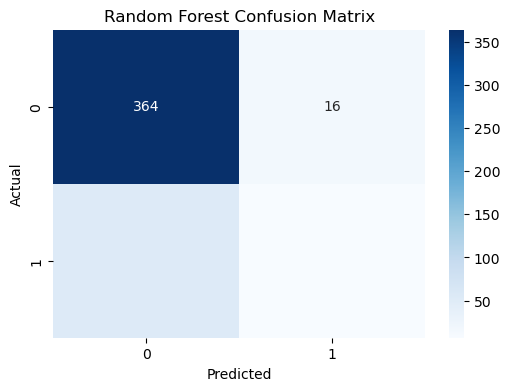

In [115]:
# Random Forest Evaluation
evaluate_model("Random Forest", y_test, forest_pred)


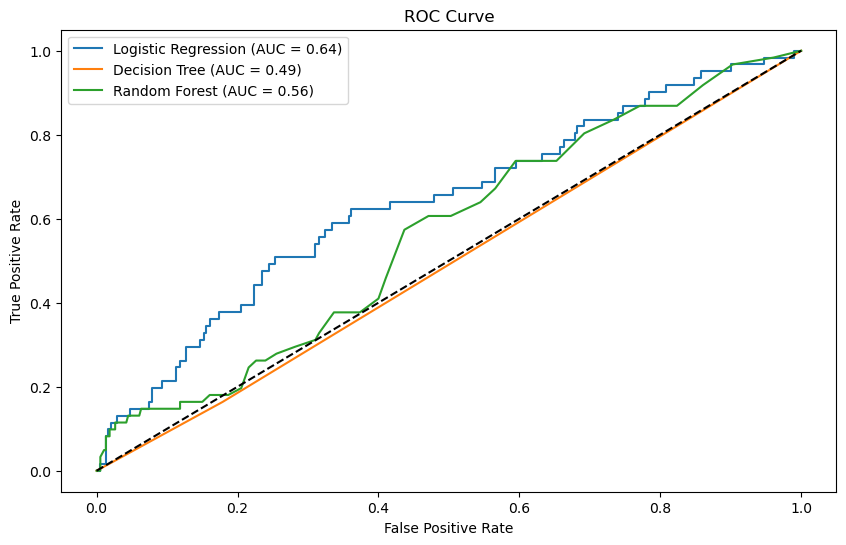

In [116]:
# Plot ROC Curves
plt.figure(figsize=(10, 6))
for model, name in [(logreg, 'Logistic Regression'), (tree, 'Decision Tree'), (forest, 'Random Forest')]:
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [118]:
# Load the new investment dataset
investment_data = pd.read_csv("C:/Users/vuyis/Downloads/archive (4)/financial time series datasets/data/DJI.csv")  # Replace with your investment dataset path

In [119]:
# Check the columns in the new investment dataset
print("New Investment Data Columns:")
print(investment_data.columns)

New Investment Data Columns:
Index(['Date', 'Value'], dtype='object')


In [123]:
# Assuming the new dataset has 'Date' and 'Returns' columns
investment_data['Date'] = pd.to_datetime(investment_data['Date'])
investment_data.set_index('Date', inplace=True)

KeyError: 'Date'

In [125]:
# Check if 'Market_Cap - Crore' exists and calculate returns
if 'Market_Cap - Crore' in investment_data.columns:
    # Calculate daily returns based on percentage change
    investment_data['Returns'] = investment_data['Market_Cap - Crore'].pct_change()  # Percentage change for returns
else:
    print("Column 'Market_Cap - Crore' does not exist.")

Column 'Market_Cap - Crore' does not exist.


In [126]:
# Resample to monthly data and calculate the sum (or mean, depending on your requirement)
monthly_data = investment_data.resample('M').sum()  # Aggregate monthly data


In [127]:
# ARIMA Forecasting
def arima_forecast(data, order=(1, 1, 1)):
    model = ARIMA(data['Returns'], order=order)  # Update 'returns' to the correct column name
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=12)  # Forecast for the next 12 months
    return forecast

In [128]:


# Facebook Prophet Forecasting
def prophet_forecast(data):
    df_prophet = data.reset_index().rename(columns={'Date': 'ds', 'Returns': 'y'})  # Update column names accordingly
    model = Prophet()
    model.fit(df_prophet)
    future = model.make_future_dataframe(periods=12, freq='M')
    forecast = model.predict(future)
    return forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]




In [133]:
# Perform ARIMA Forecast
try:
    arima_forecast_values = arima_forecast(monthly_data)
    print("ARIMA Forecast for Locked Pot Growth:")
    print(arima_forecast_values)
except KeyError as e:
    print(e)  # Handle the KeyError exception and print the message

'Returns'


In [141]:
def prophet_forecast(data):
    # Check if 'Returns' is in the DataFrame
    if 'Returns' not in data.columns:
        raise ValueError("The 'Returns' column is missing from the DataFrame.")
         #Reset the index and rename columns for Prophet
    df_prophet = data.reset_index().rename(columns={'Date': 'ds', 'Returns': 'y'})  # Ensure 'Returns' exists
    print("Prophet Data Preview:")
    print(df_prophet.head())  # Check the structure of df_prophet
    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(df_prophet)
    # Create future dates for prediction
    future = model.make_future_dataframe(periods=12, freq='M')
    forecast = model.predict(future)

    return forecast


In [142]:


# Example usage
try:
    prophet_forecast_values = prophet_forecast(monthly_data)
    print("Facebook Prophet Forecast for Locked Pot Growth:")
    print(prophet_forecast_values[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
except ValueError as e:
    print(f"Error: {e}")


Error: The 'Returns' column is missing from the DataFrame.


In [144]:
# Check the columns in the monthly_data DataFrame
print("Columns in monthly_data:", monthly_data.columns.tolist())


Columns in monthly_data: ['Value']


NameError: name 'arima_forecast_values' is not defined

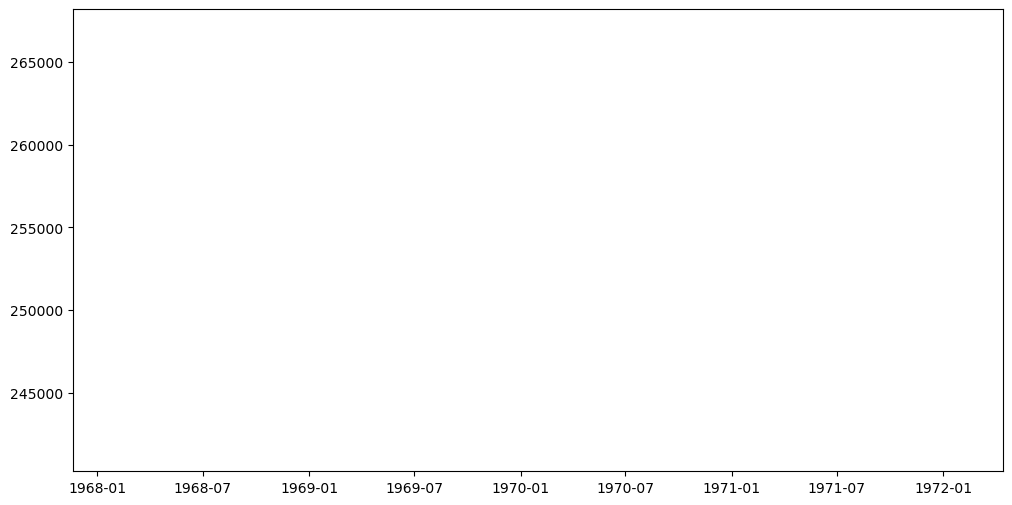

In [146]:


# Ensure you have a 'Returns' column or adjust to the correct name
# Example: If you find the column is named 'Return' instead of 'Returns'
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['Value'], label='Historical Returns')  # Adjust to the correct name
plt.plot(arima_forecast_values.index, arima_forecast_values, label='ARIMA Forecast', color='red')
plt.fill_between(prophet_forecast_values['ds'], prophet_forecast_values['yhat_lower'], prophet_forecast_values['yhat_upper'], color='pink', alpha=0.5, label='Prophet Uncertainty Interval')

plt.title('Forecast vs Historical Returns')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()
